In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import os
import scipy.optimize as spo
import matplotlib.pyplot as plt

os.chdir("..")
from util import get_data, plot_data
os.chdir(r".\optimize_something")

In [ ]:
np.__version__, pd.__version__

In [ ]:
sd=dt.datetime(2008, 1, 1)  		  	   		 	   			  		 			     			  	 
ed=dt.datetime(2009, 1, 1)  		  	   		 	   			  		 			     			  	 
syms=["GOOG", "AAPL", "GLD", "XOM"]  		  	   		 	   			  		 			     			  	 
gen_plot=False  		  	   		 	   			  		 			     			  	 

In [ ]:
dates = pd.date_range(sd, ed)  		  	   		 	   			  		 			     			  	 
prices_all = get_data(syms, dates)  # automatically adds SPY  		  	   		 	   			  		 			     			  	 
prices = prices_all[syms]  # only portfolio symbols  		  	   		 	   			  		 			     			  	 
prices_SPY = prices_all["SPY"]

In [ ]:
n=len(syms)
allocs = np.array([1/n]*n)

In [ ]:
prices = prices.ffill().bfill()

In [ ]:
prices.iloc[0]

In [ ]:
normalized_prices = prices/prices.iloc[0]
normalized_SPY = prices_SPY/prices_SPY.iloc[0]

In [ ]:
allocated_prices = allocs * normalized_prices

In [ ]:
port_vals = allocated_prices.sum(axis=1)

In [ ]:
daily_rets = (port_val / port_val.shift(1)) - 1

In [ ]:
daily_rets.sd()

In [13]:
cr = (port_vals[-1]/port_vals[0])-1
cr

-0.3056792736832119

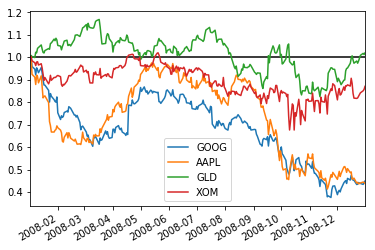

In [14]:
fig,ax = plt.subplots()

normalized_prices.plot(ax=ax)
ax.hlines(1,xmin=normalized_prices.index[0],xmax=normalized_prices.index[-1])

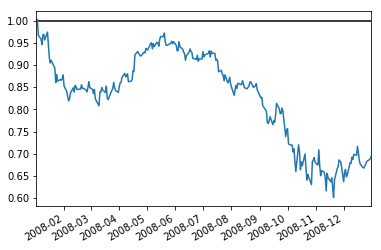

In [15]:
fig,ax = plt.subplots()

port_vals.plot(ax=ax)
ax.hlines(1,xmin=normalized_prices.index[0],xmax=normalized_prices.index[-1])

In [19]:
[(0, 1) for i in range(n)]

[(0, 1), (0, 1), (0, 1), (0, 1)]

In [17]:
# daily_rets = (df[1:]/df[:-1].values)-1 
daily_rets = port_vals[1:]

In [21]:
df_temp = pd.concat(  		  	   		 	   			  		 			     			  	 
            [port_vals, normalized_SPY], keys=["Portfolio", "SPY"], axis=1  		  	   		 	   			  		 			     			  	 
        )  

In [32]:
from matplotlib.offsetbox import AnchoredText 

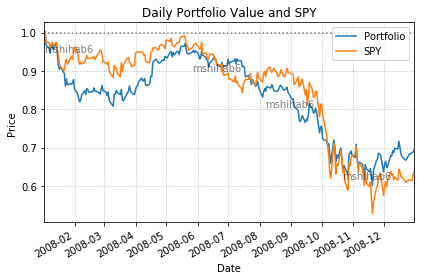

In [60]:
fig,ax = plt.subplots()
df_temp.plot(ax=ax)
ax.hlines(y=1,xmin=df_temp.index[0],xmax=df_temp.index[-1],colors="grey",linestyles="dotted")
ax.set_title("Daily Portfolio Value and SPY")
ax.set_ylabel("Price")
ax.set_xlabel("Date")
plt.text(df_temp.index[0],df_temp.Portfolio[0]-0.05,"mshihab6",fontdict={"alpha":0.5})
plt.text(df_temp.index[100],df_temp.Portfolio[100]-0.05,"mshihab6",fontdict={"alpha":0.5})
plt.text(df_temp.index[150],df_temp.Portfolio[150]-0.05,"mshihab6",fontdict={"alpha":0.5})
plt.text(df_temp.index[-50],df_temp.Portfolio[-50]-0.05,"mshihab6",fontdict={"alpha":0.5})
plt.grid(visible=True,linestyle="dotted")
plt.tight_layout()